In [1]:
import json
import pandas as pd
import gzip

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield json.loads(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

df = getDF('Grocery_and_Gourmet_Food_5.json.gz')

In [2]:
df

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5.0,True,"11 19, 2014",A1QVBUH9E1V6I8,4639725183,Jamshed Mathur,No adverse comment.,Five Stars,1416355200,NaN,NaN,NaN
1,5.0,True,"10 13, 2016",A3GEOILWLK86XM,4639725183,itsjustme,Gift for college student.,Great product.,1476316800,NaN,NaN,NaN
2,5.0,True,"11 21, 2015",A32RD6L701BIGP,4639725183,Krystal Clifton,"If you like strong tea, this is for you. It mi...",Strong,1448064000,NaN,NaN,NaN
3,5.0,True,"08 12, 2015",A2UY1O1FBGKIE6,4639725183,U. Kane,Love the tea. The flavor is way better than th...,Great tea,1439337600,NaN,NaN,NaN
4,5.0,True,"05 28, 2015",A3QHVBQYDV7Z6U,4639725183,The Nana,I have searched everywhere until I browsed Ama...,This is the tea I remembered!,1432771200,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1143855,5.0,True,"09 8, 2017",A223YRQH2Z5T1D,B01HJF6FRA,flint5292,"As a new vegan, it is sometimes difficult to r...","As a new vegan, it is sometimes difficult to ...",1504828800,4,NaN,NaN
1143856,5.0,True,"08 4, 2017",A38GDA4TB9EILT,B01HJF6FRA,Moriah Bolyard,The best thing ever is ordering a product you ...,The best thing ever is ordering a product you ...,1501804800,3,NaN,NaN
1143857,5.0,True,"07 4, 2017",A2025PN7HDC5BO,B01HJF6FRA,M.C,I used to love ranch before I became vegan. It...,Just what the vegan ordered!,1499126400,5,NaN,NaN
1143858,5.0,True,"06 7, 2017",A1NY7XWC7EPQOA,B01HJF6FRA,Greensboro,I cannot have dairy nor gluten. This is as cl...,This is as close to Ranch as I will ever be ab...,1496793600,2,NaN,NaN


In [3]:
df1=df[["overall","reviewText"]]
df1

,overall,reviewText
0,5.0,No adverse comment.
1,5.0,Gift for college student.
2,5.0,"If you like strong tea, this is for you. It mi..."
3,5.0,Love the tea. The flavor is way better than th...
4,5.0,I have searched everywhere until I browsed Ama...
...,...,...
1143855,5.0,"As a new vegan, it is sometimes difficult to r..."
1143856,5.0,The best thing ever is ordering a product you ...
1143857,5.0,I used to love ranch before I became vegan. It...
1143858,5.0,I cannot have dairy nor gluten. This is as cl...


In [4]:
df1.dropna(inplace=True)
df1

<ipython-input-4-3e2ad2f503e5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


,overall,reviewText
0,5.0,No adverse comment.
1,5.0,Gift for college student.
2,5.0,"If you like strong tea, this is for you. It mi..."
3,5.0,Love the tea. The flavor is way better than th...
4,5.0,I have searched everywhere until I browsed Ama...
...,...,...
1143855,5.0,"As a new vegan, it is sometimes difficult to r..."
1143856,5.0,The best thing ever is ordering a product you ...
1143857,5.0,I used to love ranch before I became vegan. It...
1143858,5.0,I cannot have dairy nor gluten. This is as cl...


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

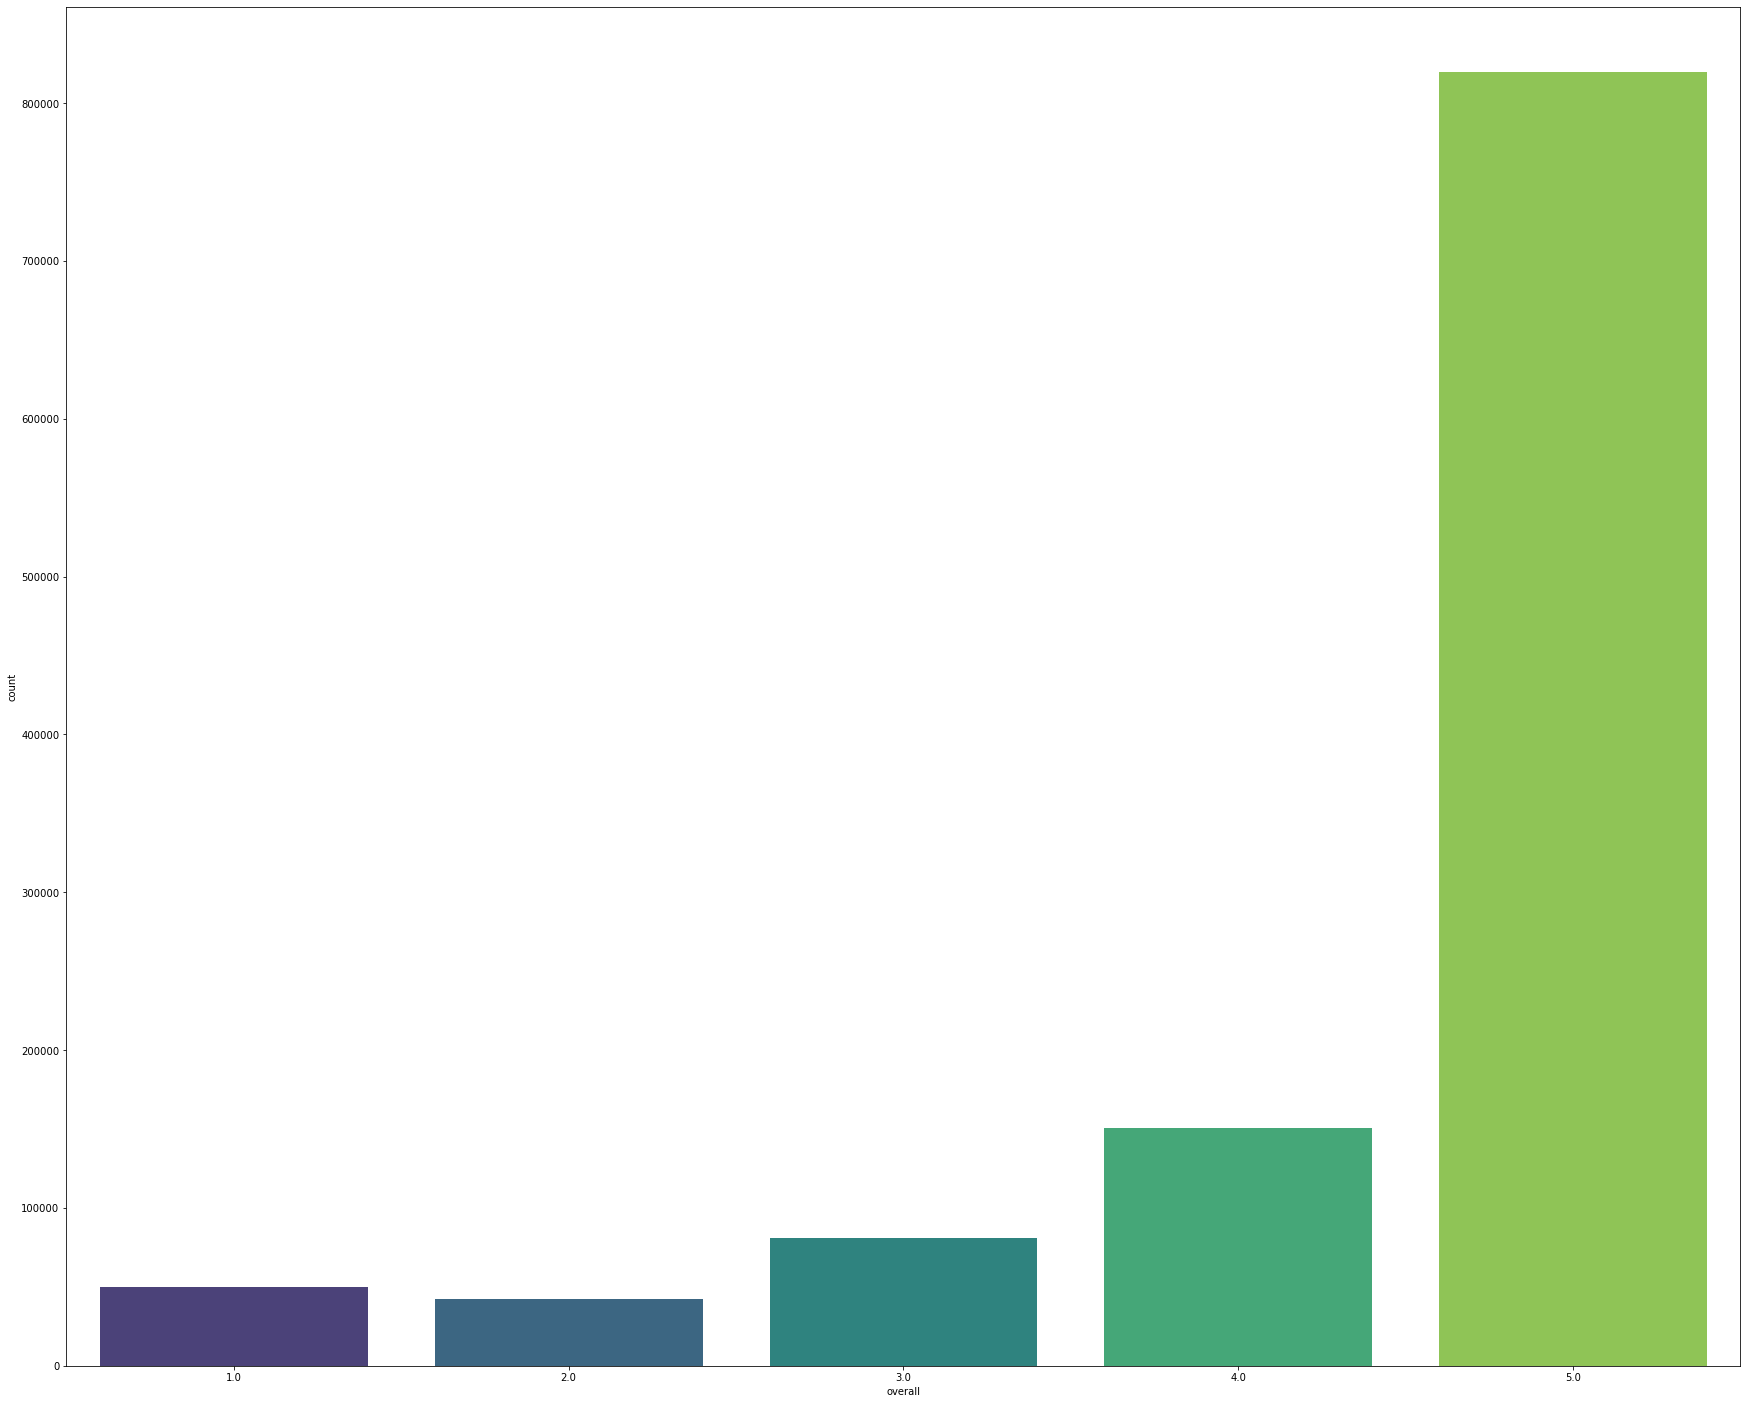

In [7]:
plt.figure(figsize=(30,25))
sns.countplot(df1.overall,palette="viridis")
plt.savefig("plot.png")

In [8]:
len(df1[df1["overall"]==2])

42128

In [9]:
(42128*3)/2

63192.0

In [10]:
df_1=df1[df1["overall"]==1].head(42128)
df_2=df1[df1["overall"]==2]
df_3=df1[df1["overall"]==3].head(42128)
df_4=df1[df1["overall"]==4].head(63192)
df_5=df1[df1["overall"]==5].head(63192)

df_n=pd.concat([df_1, df_2, df_3, df_4, df_5])
df_n

,overall,reviewText
19,1.0,This tea looks like coffee grounds. Brewed it ...
35,1.0,I bought this because I miss the taste of the ...
118,1.0,Did not say that it contains shrimp
148,1.0,This product is no where near natural / organi...
238,1.0,"I love malted milk, whether it's in malted mil..."
...,...,...
86018,5.0,"Fresh and delicious! And, none of them were sq..."
86019,5.0,Kids love it
86020,5.0,Great product!
86021,5.0,Speedy delivery! As described!\nThank you!!


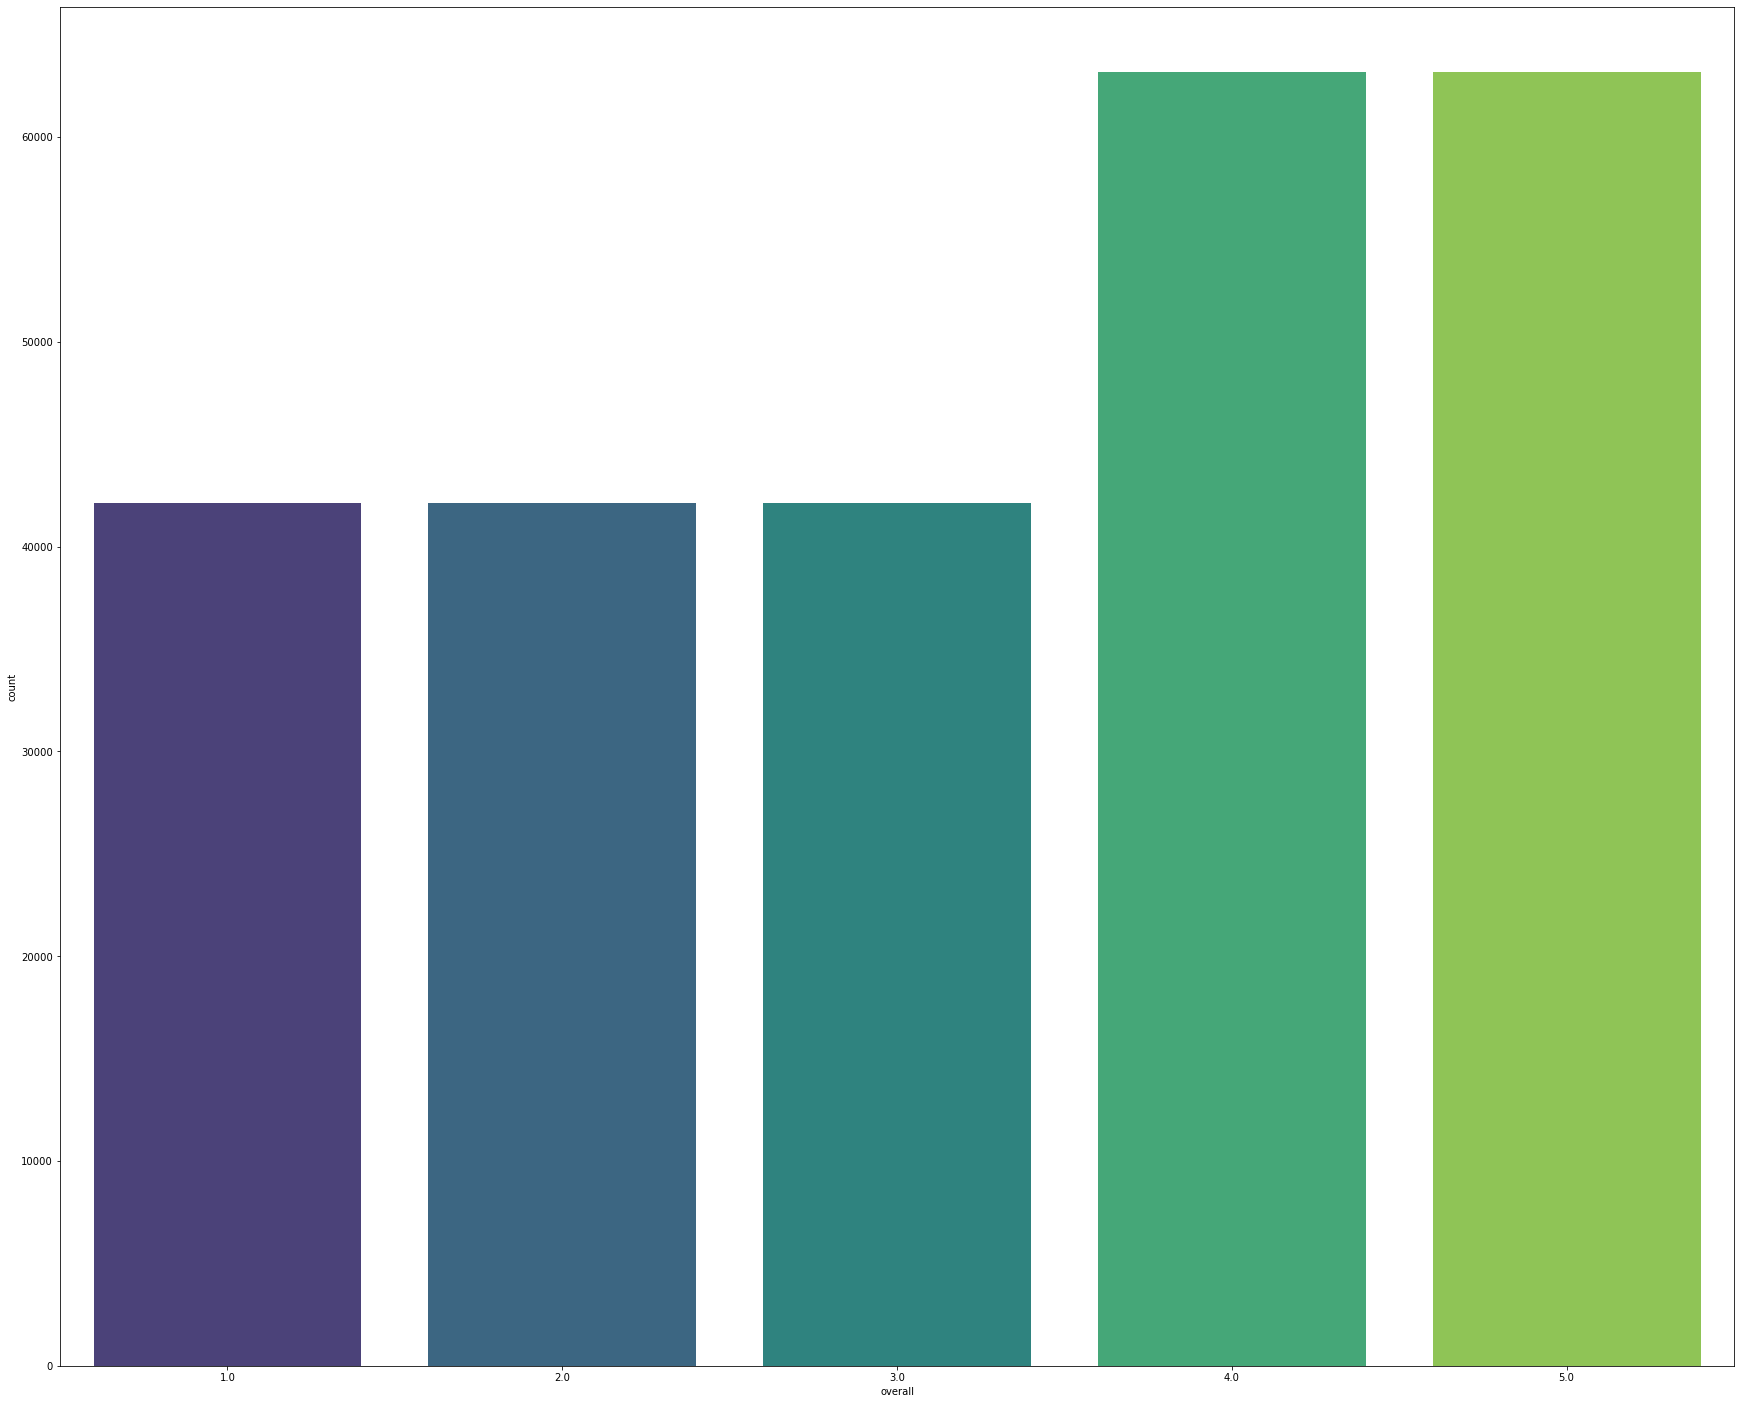

In [12]:
plt.figure(figsize=(30,25))
sns.countplot(df_n.overall,palette="viridis")
plt.savefig("plot2.png")

# PREPROCESSING

In [12]:
!pip install wordcloud
import nltk
import os
import string
import collections
import re
import pandas as pd
from nltk.corpus import twitter_samples
from nltk.corpus import stopwords
from nltk.corpus import movie_reviews

import random

In [13]:
nltk.__version__

'3.5'

In [14]:
nltk.download('punkt')
nltk.download('twitter_samples')
nltk.download('stopwords')
nltk.download('movie_reviews')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Gabriele\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\Gabriele\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Gabriele\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\Gabriele\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [15]:
df_n.reviewText = df_n.reviewText.str.lower()
df_n.head(2) #ALL LOWER

,overall,reviewText
19,1.0,this tea looks like coffee grounds. brewed it ...
35,1.0,i bought this because i miss the taste of the ...


In [16]:
df_n.reviewText = df_n.reviewText.str.replace(r'https?://\S+|www\.\S+', '', regex=True)
df_n.head(2)

,overall,reviewText
19,1.0,this tea looks like coffee grounds. brewed it ...
35,1.0,i bought this because i miss the taste of the ...


In [17]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [18]:
df_n['reviewText'] = df_n.reviewText.apply(lambda reviewText: remove_emoji(reviewText))
df_n.head(2)

,overall,reviewText
19,1.0,this tea looks like coffee grounds. brewed it ...
35,1.0,i bought this because i miss the taste of the ...


In [19]:
df_n['reviewText'] = df_n.reviewText.str.replace(r'\d+', '', regex=True)
df_n.head(2)

,overall,reviewText
19,1.0,this tea looks like coffee grounds. brewed it ...
35,1.0,i bought this because i miss the taste of the ...


# stopwords

In [20]:
STOPWORDS = set(stopwords.words('english'))

def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in STOPWORDS])

In [21]:
df_n['reviewText'] = df_n.reviewText.apply(lambda reviewText: remove_stopwords(reviewText))
df_n.head(4)

,overall,reviewText
19,1.0,tea looks like coffee grounds. brewed threw out.
35,1.0,"bought miss taste lipton tea grew with. young,..."
118,1.0,say contains shrimp
148,1.0,product near natural / organic-i wish seen rev...


In [22]:
PUNCTUATIONS = string.punctuation
def remove_punctuation(text):
    trans = str.maketrans(dict.fromkeys(PUNCTUATIONS, ' '))
    return text.translate(trans)

In [23]:
df_n['reviewText'] = df_n.reviewText.apply(lambda reviewText: remove_punctuation(reviewText))
df_n.head(4)

,overall,reviewText
19,1.0,tea looks like coffee grounds brewed threw out
35,1.0,bought miss taste lipton tea grew with young ...
118,1.0,say contains shrimp
148,1.0,product near natural organic i wish seen rev...


In [24]:
def remove_whitespaces(text):
    return " ".join(text.split())

In [25]:
df_n['reviewText'] = df_n.reviewText.apply(lambda reviewText: remove_whitespaces(reviewText))
df_n.head(4)

,overall,reviewText
19,1.0,tea looks like coffee grounds brewed threw out
35,1.0,bought miss taste lipton tea grew with young l...
118,1.0,say contains shrimp
148,1.0,product near natural organic i wish seen revie...


# Tokenization, POS, lemmatization

In [26]:
nltk.download('wordnet') 
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import WhitespaceTokenizer
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Gabriele\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
def get_wordnet_pos(word):
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

In [28]:
def tokenization_lemmatization(text):
    return [lemmatizer.lemmatize(w, get_wordnet_pos(w)) for w in w_tokenizer.tokenize(text)]

In [29]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

In [30]:
df_n['preprocessed'] = df_n.reviewText.apply(tokenization_lemmatization)

In [31]:
df_n

,overall,reviewText,preprocessed
19,1.0,tea looks like coffee grounds brewed threw out,"[tea, look, like, coffee, ground, brew, threw,..."
35,1.0,bought miss taste lipton tea grew with young l...,"[bought, miss, taste, lipton, tea, grow, with,..."
118,1.0,say contains shrimp,"[say, contains, shrimp]"
148,1.0,product near natural organic i wish seen revie...,"[product, near, natural, organic, i, wish, see..."
238,1.0,love malted milk whether malted milk balls mil...,"[love, malt, milk, whether, malt, milk, ball, ..."
...,...,...,...
86018,5.0,fresh delicious and none squished,"[fresh, delicious, and, none, squish]"
86019,5.0,kids love,"[kid, love]"
86020,5.0,great product,"[great, product]"
86021,5.0,speedy delivery described thank you,"[speedy, delivery, described, thank, you]"


In [32]:
df_n['puliti'] = df_n['preprocessed'].str.join(" ")

In [33]:
df_n.head()

,overall,reviewText,preprocessed,puliti
19,1.0,tea looks like coffee grounds brewed threw out,"[tea, look, like, coffee, ground, brew, threw,...",tea look like coffee ground brew threw out
35,1.0,bought miss taste lipton tea grew with young l...,"[bought, miss, taste, lipton, tea, grow, with,...",bought miss taste lipton tea grow with young l...
118,1.0,say contains shrimp,"[say, contains, shrimp]",say contains shrimp
148,1.0,product near natural organic i wish seen revie...,"[product, near, natural, organic, i, wish, see...",product near natural organic i wish see review...
238,1.0,love malted milk whether malted milk balls mil...,"[love, malt, milk, whether, malt, milk, ball, ...",love malt milk whether malt milk ball milk sha...


In [34]:
df_n.to_csv('df_n.csv')

# crea label pos e neg

In [13]:
df_n['overall2'] = df_n['overall'].astype(int)

In [14]:
df_n['overall2']

19       1
35       1
118      1
148      1
238      1
        ..
86018    5
86019    5
86020    5
86021    5
86022    5
Name: overall2, Length: 252768, dtype: int32

In [15]:
import numpy as np

In [16]:
df_n['overall2'] = np.where(df_n['overall2']>3, 1, 0)

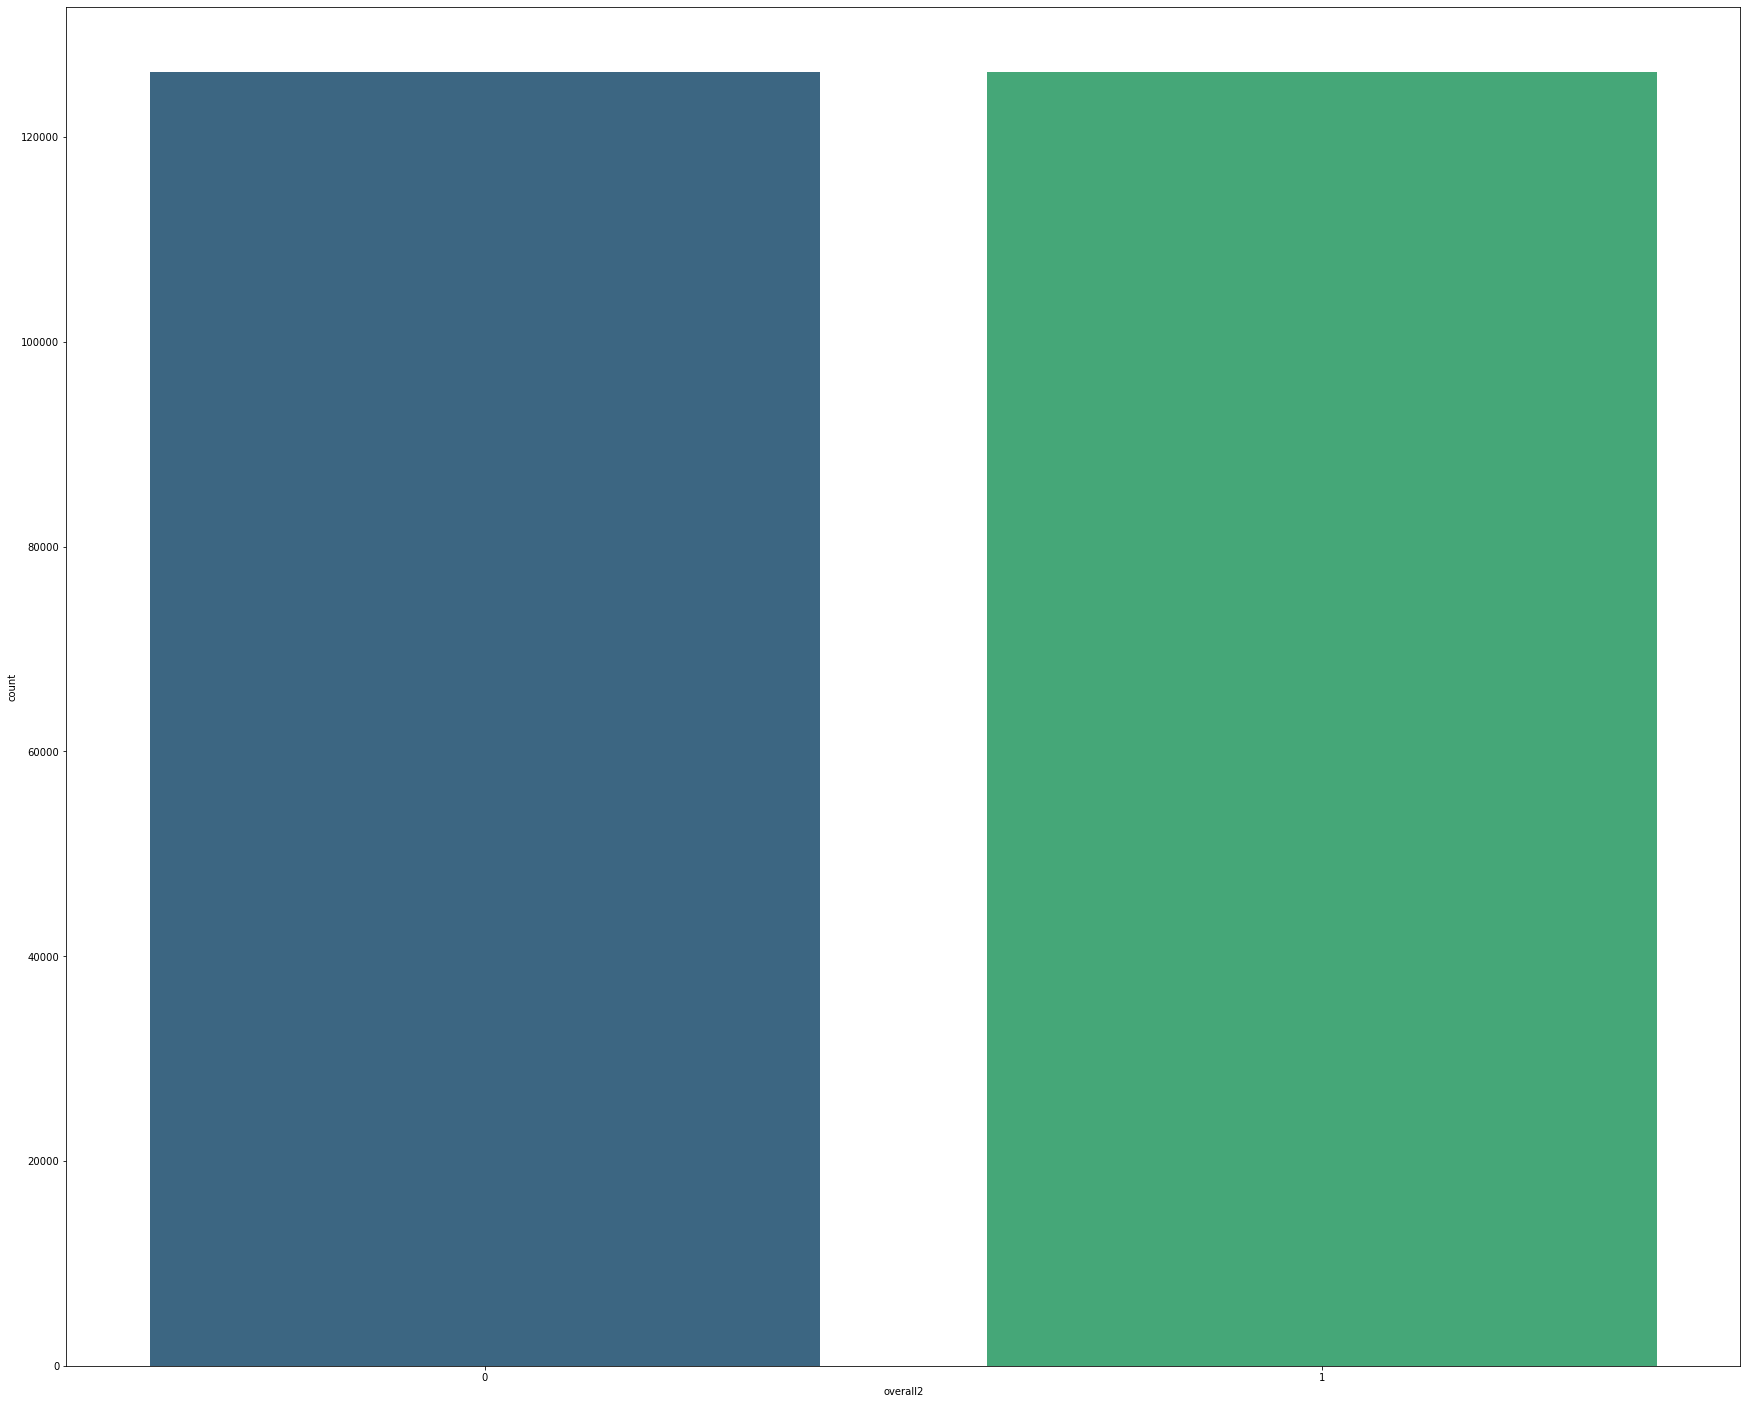

In [18]:
plt.figure(figsize=(30,25))
sns.countplot(df_n.overall2,palette="viridis")
plt.savefig("plot2.png")

# wordcloud

In [2]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

In [7]:
comment_words = ''
for val in df_n.puliti[0:1000]:
    val = str(val)
    tokens = val.split()
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()
        comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      min_font_size = 12).generate(comment_words)

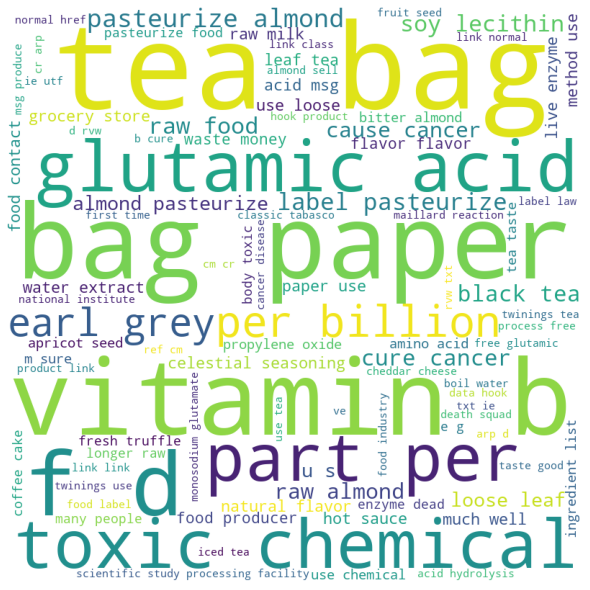

In [8]:
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

In [5]:
wordcloud.to_file("wordcloud2.png")

# TF-IDF UNIGRAM e BIGRAM

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0.0, max_df=1.0,ngram_range=(2,2), max_features=100, use_idf=True)
tv_matrix = tv.fit_transform(df_n.puliti)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,arp rvw,black tea,buy again,class link,cm cr,coconut oil,corn syrup,cr arp,cup coffee,cup tea,...,use make,ve ever,ve try,ve use,waste money,work well,would buy,would like,would recommend,year ago
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252763,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
252764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
252765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
252766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer

tv = TfidfVectorizer(min_df=0.0, max_df=1.0, max_features=110, use_idf=True)
tv_matrix = tv.fit_transform(df_n.puliti)
tv_matrix = tv_matrix.toarray()

vocab = tv.get_feature_names()
pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)

,add,again,also,amazon,bad,bag,bar,best,bit,bought,...,two,use,ve,want,water,way,well,work,would,year
0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,...,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00
1,0.0,0.0,0.16,0.0,0.0,0.16,0.0,0.00,0.0,0.17,...,0.0,0.12,0.17,0.00,0.18,0.0,0.13,0.0,0.14,0.00
2,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,...,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00
3,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,...,0.0,0.00,0.00,0.24,0.00,0.0,0.00,0.0,0.00,0.00
4,0.0,0.0,0.10,0.0,0.1,0.00,0.0,0.00,0.0,0.00,...,0.0,0.00,0.30,0.00,0.00,0.0,0.00,0.0,0.00,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252763,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,...,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00
252764,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,...,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00
252765,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,...,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00
252766,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.00,...,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00


In [50]:
df_matrix = pd.DataFrame(np.round(tv_matrix, 2), columns=vocab)
df_matrix.head()

,add,again,also,amazon,bad,bag,bar,best,bit,bought,...,two,use,ve,want,water,way,well,work,would,year
0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,...,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00
1,0.0,0.0,0.16,0.0,0.0,0.16,0.0,0.0,0.0,0.17,...,0.0,0.12,0.17,0.00,0.18,0.0,0.13,0.0,0.14,0.00
2,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,...,0.0,0.00,0.00,0.00,0.00,0.0,0.00,0.0,0.00,0.00
3,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,...,0.0,0.00,0.00,0.24,0.00,0.0,0.00,0.0,0.00,0.00
4,0.0,0.0,0.10,0.0,0.1,0.00,0.0,0.0,0.0,0.00,...,0.0,0.00,0.30,0.00,0.00,0.0,0.00,0.0,0.00,0.11


In [51]:
np.random.seed(1)
rndperm = np.random.permutation(df_matrix.shape[0])

# SVD

In [52]:
 from sklearn.decomposition import TruncatedSVD 

In [53]:
X= df_matrix.values

In [54]:
truncatedSVD=TruncatedSVD(100)
svd_result = truncatedSVD.fit_transform(X)
print(truncatedSVD.explained_variance_ratio_)

[0.01826359 0.04153212 0.03407723 0.03183879 0.03017286 0.02485952
 0.02213826 0.02102555 0.02046702 0.01925163 0.01667189 0.01429997
 0.01409318 0.01344388 0.01297572 0.01286225 0.0122928  0.01211569
 0.01151513 0.01110257 0.01101167 0.01085139 0.01067784 0.01057529
 0.01038162 0.01020221 0.01004763 0.0099911  0.00984851 0.00962295
 0.0095697  0.00934284 0.0092196  0.0090907  0.00896202 0.00888346
 0.00882818 0.00866671 0.00855666 0.00836356 0.00832996 0.0082108
 0.00809481 0.00802266 0.00781923 0.00774929 0.00769817 0.00757129
 0.00745606 0.00742642 0.00730771 0.00729022 0.00717902 0.00711564
 0.00705692 0.0069621  0.00695014 0.00689155 0.00686544 0.00678441
 0.0067618  0.00666322 0.0066161  0.00660444 0.00654678 0.00648658
 0.00643303 0.00641227 0.00639706 0.00635294 0.00630744 0.00624981
 0.00614159 0.00609165 0.00605873 0.00595346 0.00577703 0.0056715
 0.00561227 0.00549105 0.00543566 0.00539037 0.00530602 0.00523997
 0.00520596 0.00519428 0.00514558 0.00512932 0.00507047 0.004996

In [55]:
print(truncatedSVD.explained_variance_ratio_.sum())

0.9600825582278361


In [56]:
print(truncatedSVD.singular_values_)

[146.3077016   96.17209635  87.13955362  84.22869755  82.44842496
  74.44695214  70.19607525  68.39497953  67.4535498   65.4686744
  60.9621153   56.38238596  55.97399158  54.68150988  53.72467816
  53.47333229  52.3286255   51.90415217  50.63444529  49.70870307
  49.47769556  49.12316279  48.72260164  48.50613013  48.07513439
  47.63818862  47.29383194  47.14722355  46.79097694  46.25217715
  46.13236916  45.57569847  45.27612194  44.96168809  44.69255584
  44.43958648  44.31461866  43.89673382  43.61540837  43.11988958
  43.04299403  42.75772008  42.42082533  42.25882585  41.69648773
  41.50580871  41.3684776   41.02773818  40.71435545  40.64183545
  40.30570218  40.25743838  39.94963841  39.77330067  39.60832527
  39.34226553  39.30768464  39.14146421  39.07031665  38.84895894
  38.77161486  38.48737633  38.35134582  38.31982275  38.15806548
  37.97390489  37.81672158  37.75598208  37.71180848  37.58444832
  37.44987758  37.2743593   36.95103364  36.80014805  36.70188437
  36.380206

# train e test

In [64]:
from sklearn import model_selection

In [65]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df_n['puliti'],
                                                                    df_n['overall2'], 
                                                                    test_size=0.15, 
                                                                    random_state=8)

In [ ]:
# da qui in giù vanno sistemati i nomi delle colonne

# TEXT CLASSIFICATION, opinion mining

In [58]:
df_n3 = df_n[['overall2', 'puliti']]
df_n3.head()

,overall2,puliti
19,0,tea look like coffee ground brew threw out
35,0,bought miss taste lipton tea grow with young l...
118,0,say contains shrimp
148,0,product near natural organic i wish see review...
238,0,love malt milk whether malt milk ball milk sha...


In [59]:
from sklearn.model_selection import train_test_split
train_rating, test_rating = train_test_split(df_n3, test_size = 0.15, random_state=1)

In [61]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [62]:
def tokenization(data):
    tokenizer = Tokenizer(num_words=100000)
    tokenizer.fit_on_texts(data['puliti'].values)
    word_index = tokenizer.word_index
    print('Found %s unique tokens.' % len(word_index))
    return tokenizer
  
def word_emb_seq(data, tokenizer):
    X = tokenizer.texts_to_sequences(data['puliti'].values)
    X = pad_sequences(X, maxlen=100)
    print('Shape of data tensor:', X.shape)
    return X



In [63]:
%time tok_train_rating = tokenization(train_rating)
%time tok_test_rating = tokenization(test_rating)

Found 45658 unique tokens.
Wall time: 15.3 s
Found 21008 unique tokens.
Wall time: 2.57 s


In [64]:
from keras.preprocessing.sequence import pad_sequences

In [65]:
%time train_we_rating = word_emb_seq(train_rating, tok_train_rating)
%time test_we_rating = word_emb_seq(test_rating, tok_train_rating)

Shape of data tensor: (214852, 100)
Wall time: 15.3 s
Shape of data tensor: (37916, 100)
Wall time: 2.51 s


In [67]:
!pip install tensorflow

In [68]:
!pip install keras

In [69]:
import tensorflow

In [70]:
train_label_rating = train_rating.overall2
test_label_rating = test_rating.overall2

train_label_rating = tensorflow.keras.utils.to_categorical(train_label_rating, num_classes=2)
test_label_rating = tensorflow.keras.utils.to_categorical(test_label_rating, num_classes=2)

In [71]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dense, Dropout, TimeDistributed, Embedding, LSTM, GRU, Conv1D, AveragePooling1D, Flatten, MaxPooling1D

In [135]:


def rnn_model_():
    model = Sequential()
    model.add(Embedding(100000, 100, input_length=train_we_rating.shape[1]))
    model.add(LSTM(128, recurrent_dropout=0.5, dropout=0.5))
    model.add(Dense(2, activation='sigmoid'))

    model.summary()

    model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
  
    return model

In [136]:
model_rating = rnn_model_()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 100)          10000000  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 2)                 258       
                                                                 
Total params: 10,117,506
Trainable params: 10,117,506
Non-trainable params: 0
_________________________________________________________________


In [72]:
import sklearn

In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [146]:
#class_weights = sklearn.utils.class_weight.compute_sample_weight(class_weight='balanced', y=train_label_rating)

%time network_history_rating = model_rating.fit(train_we_rating,\
                                                train_label_rating, \
                                                epochs=4, batch_size=1024, \
                                                validation_data=(test_we_rating, test_label_rating))#,class_weight=class_weights)

Epoch 1/4
210/210 [==============================] - 886s 4s/step - loss: 0.4062 - accuracy: 0.8222 - val_loss: 0.3789 - val_accuracy: 0.8365
Epoch 2/4
210/210 [==============================] - 978s 5s/step - loss: 0.3539 - accuracy: 0.8483 - val_loss: 0.3625 - val_accuracy: 0.8418
Epoch 3/4
210/210 [==============================] - 1045s 5s/step - loss: 0.3271 - accuracy: 0.8605 - val_loss: 0.3595 - val_accuracy: 0.8430
Epoch 4/4
210/210 [==============================] - 1031s 5s/step - loss: 0.3058 - accuracy: 0.8707 - val_loss: 0.3597 - val_accuracy: 0.8430
Wall time: 1h 5min 45s


In [74]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

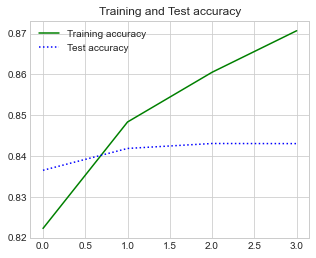

In [154]:
epoch = network_history_rating.epoch

plt.style.use('seaborn-whitegrid')
loss = network_history_rating.history['accuracy']
val_loss = network_history_rating.history['val_accuracy']
 
plt.figure(figsize=(5,4))
plt.plot(epoch, loss, 'g', label='Training accuracy')
plt.plot(epoch, val_loss, 'b:', label='Test accuracy')
plt.title('Training and Test accuracy')
plt.legend()
plt.show()

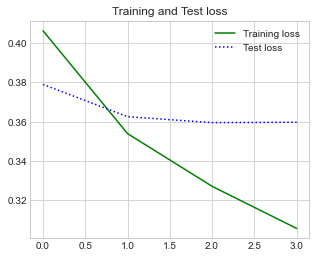

In [155]:
plt.style.use('seaborn-whitegrid')
loss = network_history_rating.history['loss']
val_loss = network_history_rating.history['val_loss']
 
plt.figure(figsize=(5,4))
plt.plot(epoch, loss, 'g', label='Training loss')
plt.plot(epoch, val_loss, 'b:', label='Test loss')
plt.title('Training and Test loss')
plt.legend()
plt.show()

In [173]:
#metrics on validation set
%time y_preds = model_rating.predict(test_we_rating)
y2_preds = np.argmax(y_preds,axis=1)
y_test_ = [np.argmax(y, axis=None, out=None) for y in test_label_rating]

target_names = ['negative','positive']
print(classification_report(y_test_, y2_preds, target_names=target_names))

Wall time: 38.6 s
              precision    recall  f1-score   support

    negative       0.85      0.84      0.84     19146
    positive       0.84      0.84      0.84     18770

    accuracy                           0.84     37916
   macro avg       0.84      0.84      0.84     37916
weighted avg       0.84      0.84      0.84     37916



# Compute sentiment score

In [81]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [78]:
df_n2 = df_n

In [79]:
df_n2.reset_index(inplace=True)

In [80]:
df_n2['compound'] = [sia.polarity_scores(x)['compound'] for x in df_n2['puliti']]
df_n2['neg'] = [sia.polarity_scores(x)['neg'] for x in df_n2['puliti']]
df_n2['neu'] = [sia.polarity_scores(x)['neu'] for x in df_n2['puliti']]
df_n2['pos'] = [sia.polarity_scores(x)['pos'] for x in df_n2['puliti']]
df_n2.head()

,index,overall,reviewText,preprocessed,puliti,overall2,compound,neg,neu,pos
0,19,1.0,tea looks like coffee grounds brewed threw out,"[tea, look, like, coffee, ground, brew, threw,...",tea look like coffee ground brew threw out,0,0.3612,0.000,0.737,0.263
1,35,1.0,bought miss taste lipton tea grew with young l...,"[bought, miss, taste, lipton, tea, grow, with,...",bought miss taste lipton tea grow with young l...,0,0.3612,0.099,0.782,0.119
2,118,1.0,say contains shrimp,"[say, contains, shrimp]",say contains shrimp,0,0.0000,0.000,1.000,0.000
3,148,1.0,product near natural organic i wish seen revie...,"[product, near, natural, organic, i, wish, see...",product near natural organic i wish see review...,0,0.5859,0.064,0.737,0.199
4,238,1.0,love malted milk whether malted milk balls mil...,"[love, malt, milk, whether, malt, milk, ball, ...",love malt milk whether malt milk ball milk sha...,0,0.1604,0.194,0.615,0.191


# Text Clustering

In [82]:
df_n4 = df_n2[['overall2', 'compound']]

In [89]:
from sklearn.cluster import KMeans
from sklearn.metrics import v_measure_score
from sklearn.metrics.cluster import adjusted_rand_score

km = KMeans(n_clusters=4, max_iter=100, n_init=100, random_state=42).fit(df_n4)
y_clus= km.predict(df_n4)

In [90]:
clusters = km.labels_
clusters = pd.Series(clusters)
clusters

0         2
1         2
2         0
3         2
4         0
         ..
252763    1
252764    1
252765    1
252766    3
252767    1
Length: 252768, dtype: int32

In [91]:
df_finito = df_n4.merge(clusters.rename('cluster'), left_index=True, right_index=True)
df_finito.head()

,overall2,compound,cluster
0,0,0.3612,2
1,0,0.3612,2
2,0,0.0000,0
3,0,0.5859,2
4,0,0.1604,0


In [92]:
df_finito.loc[(df_finito['cluster']==0) & (df_finito['overall2']==1)]

,overall2,compound,cluster


In [93]:
df_finito.loc[(df_finito['cluster']==3) & (df_finito['compound']<0.500)]

,overall2,compound,cluster
126384,1,0.2732,3
126387,1,-0.3626,3
126397,1,0.3612,3
126398,1,0.0000,3
126399,1,0.4404,3
...,...,...,...
252753,1,0.2075,3
252755,1,0.4404,3
252759,1,0.3612,3
252762,1,-0.5916,3


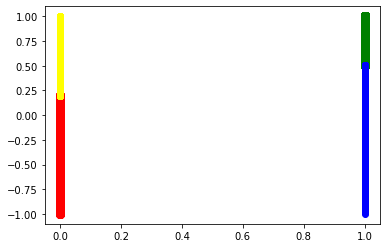

In [94]:
import matplotlib.pyplot as plt
 
#filter rows of original data
cluster0 = df_finito.loc[df_finito['cluster'] == 0]
cluster1 = df_finito.loc[df_finito['cluster'] == 1]
cluster2 = df_finito.loc[df_finito['cluster'] == 2]
cluster3 = df_finito.loc[df_finito['cluster'] == 3]

 
#plotting the results
plt.scatter(cluster0[0:]['overall2'] , cluster0[0:]['compound'], color = 'red', linewidths=3)
plt.scatter(cluster1[0:]['overall2'] , cluster1[0:]['compound'], color = 'green', linewidths=3)
plt.scatter(cluster2[0:]['overall2'] , cluster2[0:]['compound'], color = 'yellow')
plt.scatter(cluster3[0:]['overall2'] , cluster3[0:]['compound'], color = 'blue')

plt.show()